In [1]:
pip install yfinance

In [349]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import scipy.stats as si
import os
from mpl_toolkits.mplot3d import Axes3D

In [350]:
initial_data = yf.download("BIIB ^VIX", start="2020-10-02", end="2021-10-01")


[*********************100%***********************]  2 of 2 completed


In [351]:
initial_data.head()

Adj Close                  Close                   High  \
                  BIIB       ^VIX        BIIB       ^VIX        BIIB   
Date                                                                   
2020-10-01  285.570007  26.700001  285.570007  26.700001  286.170013   
2020-10-02  277.640015  27.629999  277.640015  27.629999  285.470001   
2020-10-05  284.179993  27.959999  284.179993  27.959999  285.920013   
2020-10-06  281.149994  29.480000  281.149994  29.480000  285.899994   
2020-10-07  285.750000  28.059999  285.750000  28.059999  287.079987   

                              Low                   Open             Volume  \
                 ^VIX        BIIB       ^VIX        BIIB       ^VIX    BIIB   
Date                                                                          
2020-10-01  27.110001  280.589996  25.330000  284.959991  25.780001  971600   
2020-10-02  29.900000  276.059998  26.930000  281.649994  28.870001  976000   
2020-10-05  29.690001  277.359985  27.270000  278.670013  29.520000  888000   
2020-10-06  30.000000  279.390015  26.010000  284.170013  28.049999  758100   
2020-10-07  29.760000  280.899994  27.940001  282.239990  29.260000  646500   

                 
           ^VIX  
Date             
2020-10-01    0  
2020-10-02    0  
2020-10-05    0  
2020-10-06    0  
2020-10-07    0

In [352]:
initial_data['Adj Close'].head()

,BIIB,^VIX
Date,,
2020-10-01,285.570007,26.700001
2020-10-02,277.640015,27.629999
2020-10-05,284.179993,27.959999
2020-10-06,281.149994,29.480000
2020-10-07,285.750000,28.059999


In [353]:
data =  initial_data['Adj Close']
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-10-01 to 2021-09-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BIIB    252 non-null    float64
 1   ^VIX    252 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


In [354]:
data.head()

,BIIB,^VIX
Date,,
2020-10-01,285.570007,26.700001
2020-10-02,277.640015,27.629999
2020-10-05,284.179993,27.959999
2020-10-06,281.149994,29.480000
2020-10-07,285.750000,28.059999


In [355]:
data.tail()

,BIIB,^VIX
Date,,
2021-09-24,291.709991,17.750000
2021-09-27,286.619995,18.760000
2021-09-28,284.709991,23.250000
2021-09-29,285.559998,22.559999
2021-09-30,282.989990,23.139999


array([<AxesSubplot:xlabel='Date'>], dtype=object)

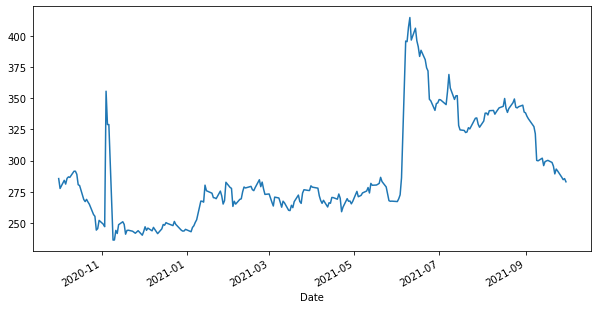

In [356]:
data["BIIB"].plot(figsize=(10, 5), subplots=True)

# Summary Statistics

In [357]:
data.describe().round(2)

,BIIB,^VIX
count,252.00,252.00
mean,290.05,21.27
std,40.83,4.62
min,236.26,15.07
25%,265.60,17.68
50%,275.96,20.78
75%,325.64,23.25
max,414.71,40.28


In [358]:
data.diff().describe().round(2)

,BIIB,^VIX
count,251.00,251.00
mean,-0.01,-0.01
std,12.70,2.01
min,-92.64,-7.00
25%,-3.01,-0.95
50%,-0.45,-0.21
75%,2.74,0.81
max,109.71,14.19


In [359]:
data.pct_change().round(4).head()

,BIIB,^VIX
Date,,
2020-10-01,NaN,NaN
2020-10-02,-0.0278,0.0348
2020-10-05,0.0236,0.0119
2020-10-06,-0.0107,0.0544
2020-10-07,0.0164,-0.0482


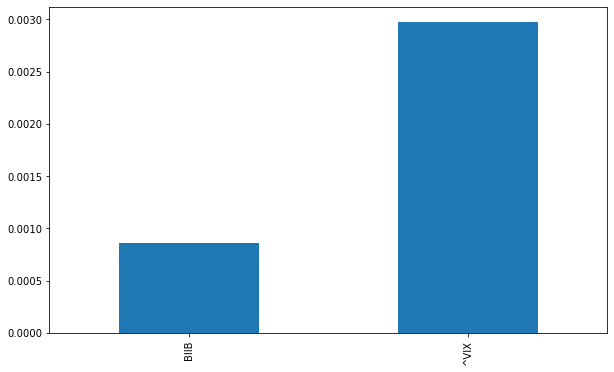

In [360]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6));

# Rolling Stats - Moving Avg and Bollinger Bands

In [361]:
sym = 'BIIB'
BIIB_data = pd.DataFrame(data[sym]).dropna()
BIIB_data.tail()

,BIIB
Date,
2021-09-24,291.709991
2021-09-27,286.619995
2021-09-28,284.709991
2021-09-29,285.559998
2021-09-30,282.989990


In [362]:
window = 10
BIIB_data['min'] = data[sym].rolling(window=window).min()
BIIB_data['mean'] = data[sym].rolling(window=window).mean()
BIIB_data['std'] = data[sym].rolling(window=window).std()
BIIB_data['median'] = data[sym].rolling(window=window).median()
BIIB_data['max'] = data[sym].rolling(window=window).max()
BIIB_data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()
BIIB_data.dropna().head()

,BIIB,min,mean,std,median,max,ewma
Date,,,,,,,
2020-10-14,289.019989,277.640015,285.971002,4.308438,286.145004,291.480011,289.553391
2020-10-15,280.630005,277.640015,285.477002,4.630680,286.145004,291.480011,282.860850
2020-10-16,280.010010,280.010010,285.714001,4.228170,286.145004,291.480011,280.722720
2020-10-19,268.769989,268.769989,284.173001,6.846705,286.145004,291.480011,271.758172
2020-10-20,267.119995,267.119995,282.770001,8.717025,286.145004,291.480011,268.279539


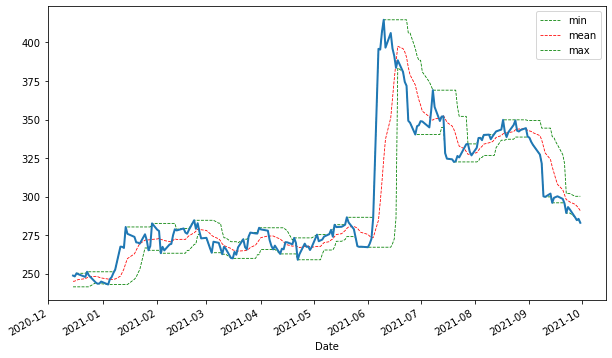

In [363]:
ax = BIIB_data[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)
data[sym].iloc[-200:].plot(ax=ax, lw=2.0);

In [364]:
BIIB_data['SMA1'] = data[sym].rolling(window=20).mean()
BIIB_data['SMA2'] = data[sym].rolling(window=60).mean()
BIIB_data[[sym, 'SMA1', 'SMA2']].tail()

,BIIB,SMA1,SMA2
Date,,,
2021-09-24,291.709991,312.396001,330.604333
2021-09-27,286.619995,309.567500,329.565999
2021-09-28,284.709991,306.581999,328.499166
2021-09-29,285.559998,303.914499,327.510332
2021-09-30,282.989990,301.151999,326.304666


In [365]:
data.describe().round(2)

,BIIB,^VIX
count,252.00,252.00
mean,290.05,21.27
std,40.83,4.62
min,236.26,15.07
25%,265.60,17.68
50%,275.96,20.78
75%,325.64,23.25
max,414.71,40.28


<AxesSubplot:xlabel='Date'>

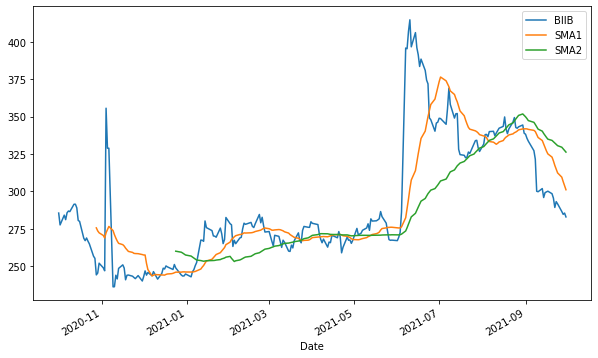

In [366]:
BIIB_data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6))

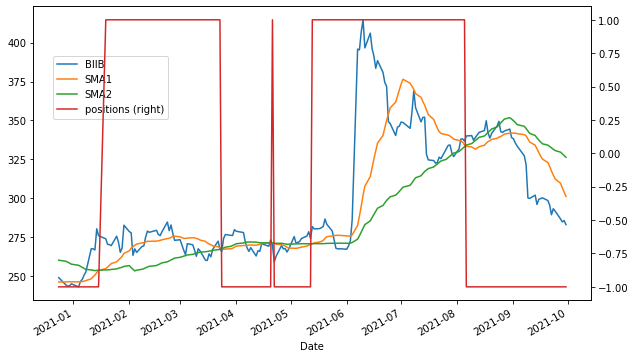

In [367]:
BIIB_data.dropna(inplace=True)
BIIB_data['positions'] = np.where(BIIB_data['SMA1'] > BIIB_data['SMA2'],1,-1)
ax = BIIB_data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

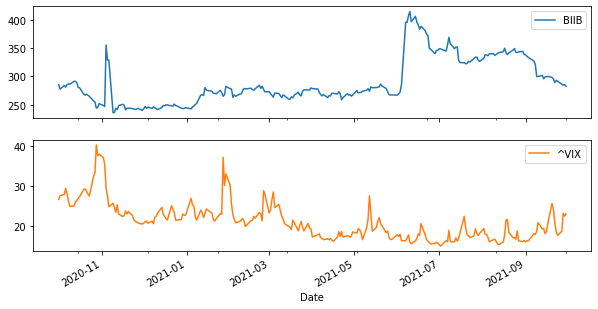

In [368]:
data.plot(figsize=(10, 5), subplots=True)

# CORRELATION ANALYSIS & PRICE DISTRIBUTION

In [369]:
Corr_data = data[['BIIB', '^VIX']].dropna()
Corr_data.tail()

,BIIB,^VIX
Date,,
2021-09-24,291.709991,17.750000
2021-09-27,286.619995,18.760000
2021-09-28,284.709991,23.250000
2021-09-29,285.559998,22.559999
2021-09-30,282.989990,23.139999


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

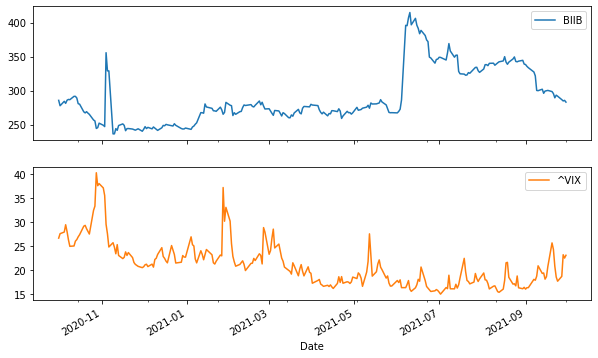

In [370]:
Corr_data.plot(subplots=True, figsize=(10, 6))

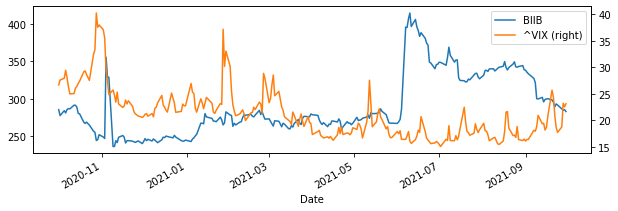

In [371]:
Corr_data.loc['2020-10-01':'2021-10-01'].plot(secondary_y='^VIX', figsize=(10, 3));


In [372]:
sprets = np.log(Corr_data / Corr_data.shift(1))
sprets.head()

,BIIB,^VIX
Date,,
2020-10-01,NaN,NaN
2020-10-02,-0.028162,0.034239
2020-10-05,0.023282,0.011873
2020-10-06,-0.010720,0.052937
2020-10-07,0.016229,-0.049367


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

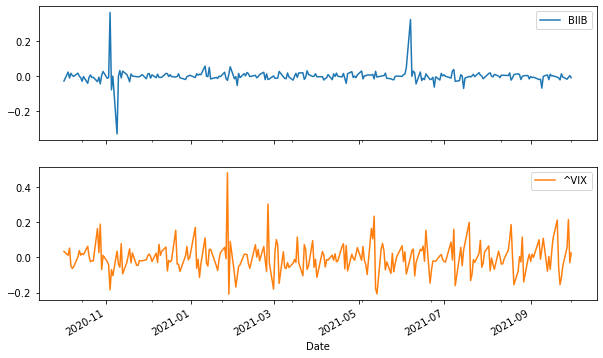

In [373]:
sprets.dropna(inplace=True)
sprets.plot(subplots=True, figsize=(10, 6))

array([[<AxesSubplot:xlabel='BIIB', ylabel='BIIB'>,
        <AxesSubplot:xlabel='^VIX', ylabel='BIIB'>],
       [<AxesSubplot:xlabel='BIIB', ylabel='^VIX'>,
        <AxesSubplot:xlabel='^VIX', ylabel='^VIX'>]], dtype=object)

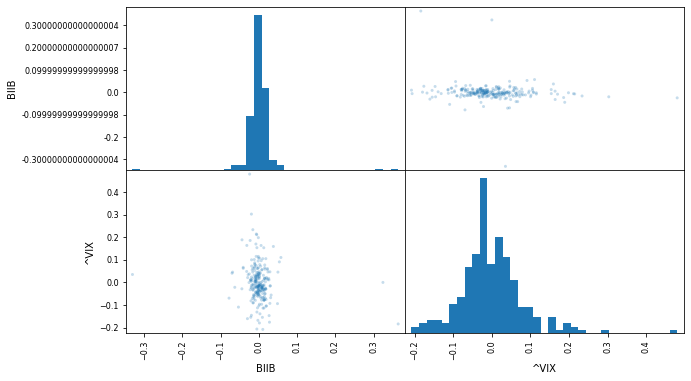

In [374]:
pd.plotting.scatter_matrix(sprets, alpha=0.25, diagonal='hist', hist_kwds={'bins': 35}, figsize=(10, 6))


# Plotting Volatility

In [375]:
bvol = data["BIIB"]
log_return = np.log(bvol / bvol.shift(1))


In [490]:
vol = np.sqrt(252) * log_return.std()
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 66.03 %


In [494]:
vix = data['^VIX'][-1]
print('The market volatility is', round(vix,2), '%')

The market volatility is 23.14 %


# BINOMIAL TREE

In [530]:
S0 = 282.99           # spot price
K = 280               # strike price
T = 1.0               # time to maturity
r = 0.0146            # risk free rate, 10 year Treasury Yield 
sig = 0.6603          # Volatility
N = 3                 # number of periods or number of time steps  
payoff = "put"        # option 

In [531]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 

In [532]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [533]:
S

array([[282.99      , 414.31889044, 606.59437779, 888.10031999],
       [  0.        , 193.28913537, 282.99      , 414.31889044],
       [  0.        ,   0.        , 132.02123698, 193.28913537],
       [  0.        ,   0.        ,   0.        ,  90.17375436]])

In [534]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.4120777280691958

In [535]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,  86.71086463],
       [  0.        ,   0.        ,   0.        , 189.82624564]])

In [536]:
# for American Option
if payoff =="put":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(K - S[i,j],np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
V

array([[ 74.99723684,  29.68152489,   0.        ,   0.        ],
       [  0.        , 107.38157175,  50.73175225,   0.        ],
       [  0.        ,   0.        , 147.97876302,  86.71086463],
       [  0.        ,   0.        ,   0.        , 189.82624564]])

In [537]:
print('American ' + payoff, str( V[0,0]))

American put 74.9972368377177


# MONTE CARLO SIMULATION

In [389]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [390]:
T = 1
r = 0.0146
sigma = 0.6603
S0 = 282.99
K = 280

In [391]:
S = mcs_simulation_np(1000)

In [392]:
S = np.transpose(S)
S

array([[282.99      , 291.06608781, 290.44131159, ..., 690.65304939,
        695.29489236, 696.85231079],
       [282.99      , 289.45086292, 292.37077846, ...,  87.49691052,
         87.94796691,  87.9562174 ],
       [282.99      , 279.0976487 , 269.93485745, ...,  38.90071385,
         38.92966599,  39.14661333],
       ...,
       [282.99      , 282.26590448, 284.72559707, ..., 205.10694102,
        209.63863423, 213.56477018],
       [282.99      , 287.37991786, 284.86035156, ..., 281.87241848,
        274.73136033, 278.63853517],
       [282.99      , 276.92083351, 266.90381108, ..., 286.05790193,
        293.11928408, 295.40288064]])

In [393]:
S = mcs_simulation_np(10000)

In [394]:
S = np.transpose(S)
S

array([[282.99      , 280.01681455, 281.19516445, ..., 142.16340191,
        142.98325706, 143.06862485],
       [282.99      , 284.46404367, 285.17243632, ..., 357.24672401,
        358.52113376, 356.32862389],
       [282.99      , 284.68827095, 284.06321393, ..., 116.02300677,
        115.33495425, 114.4902888 ],
       ...,
       [282.99      , 284.0928858 , 286.94521305, ...,  95.65705383,
         96.13130296,  95.54360435],
       [282.99      , 288.50848826, 291.36010112, ..., 252.61082192,
        251.58911562, 251.73491396],
       [282.99      , 284.91859391, 282.80883193, ..., 256.36350228,
        254.11839567, 256.95738791]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

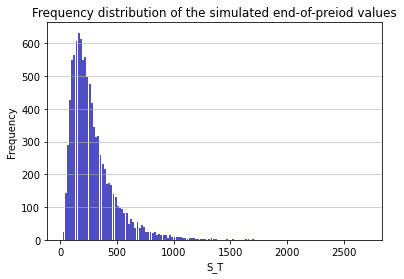

In [395]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [545]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('BIIB put', str(p))

BIIB put 69.13427756779154


# Average of two Models

In [548]:
avgVal= (V[0,0]+p)/ 2
print('The avrage & fair price of the ',payoff,'option should be ', round(avgVal ,3))

The avrage & fair price of the  put option should be  72.066


# GREEKS

# DELTA

In [430]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [431]:
delta(282.99, 280, 1, 0.0146, 0, 0.6603, 'put')

-0.35630698519463744

In [432]:
S = np.linspace(1,1000,35)
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Put [i] = delta(S[i], 280, 1, 0.0146, 0, 0.6603, 'put')

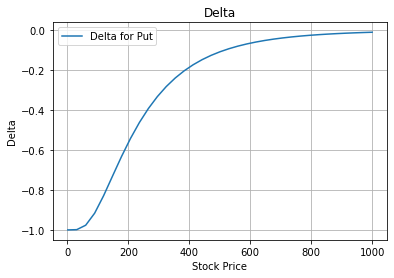

In [433]:
fig = plt.figure()
plt.plot(S, Delta_Put)
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Put'])

# Surface of Delta

In [434]:
S = np.linspace(50, 800, 51)
T = np.linspace(0.1, 1, 12)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 280, T[i], 0.0146, 0, 0.6603, 'put')

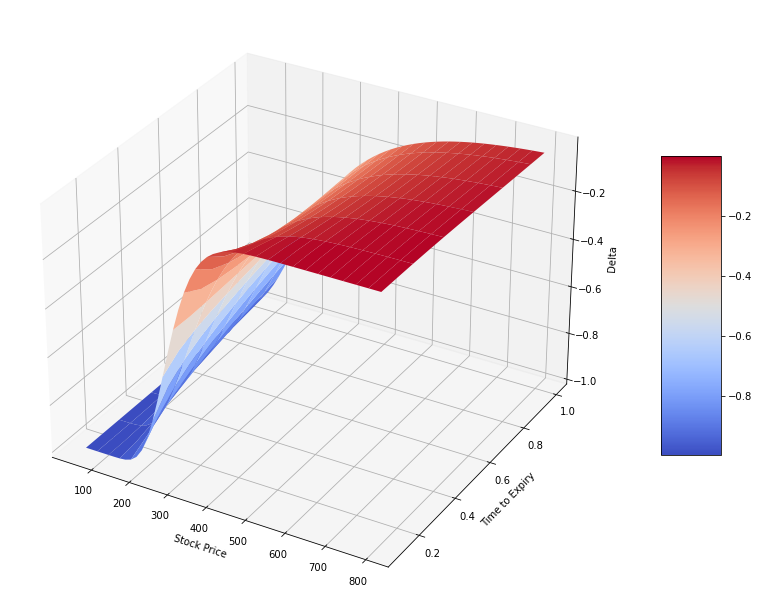

In [435]:
fig = plt.figure(figsize=(20, 11))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# GAMMA

In [436]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [437]:
gamma(282.99, 280, 1, 0.0146, 0, 0.6603, 'put')

0.0019949643146362234

In [438]:
S = np.linspace(1,1000,50)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 280, 1, 0.0146, 0, 0.6603, 'put')

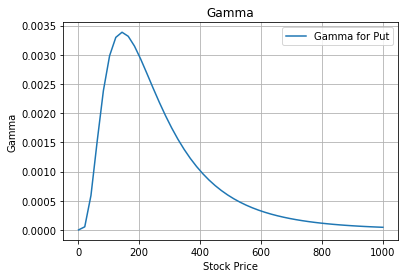

In [439]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Put'])

# Surface of Gamma

In [440]:
S = np.linspace(1, 500, 20)
T = np.linspace(0.1, 1, 20)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 280, T[i], 0.0146, 0, 0.6603, 'put')

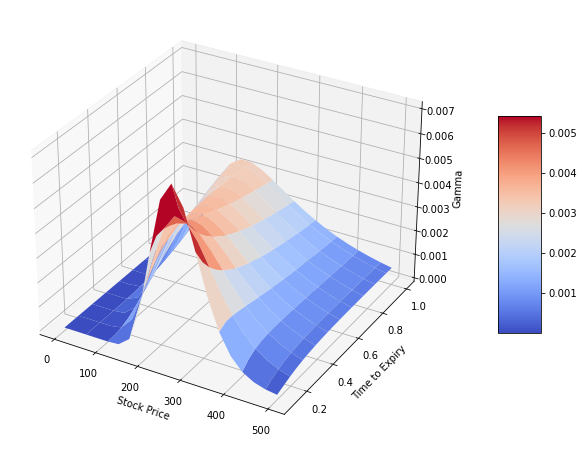

In [441]:
fig = plt.figure(figsize=(20,8))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

# SPEED

In [442]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [443]:
speed(282.99, 280, 1, 0.0146, 0, 0.6603, 'put')

-1.0982201688070664e-05

In [444]:
S = np.linspace(1,1000,35)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 280, 1, 0.0146, 0, 0.6603, 'put')

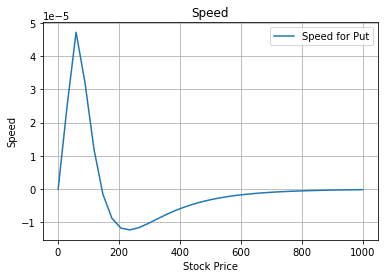

In [445]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Put'])

# Surface of Speed

In [446]:
S = np.linspace(50, 350, 51)
T = np.linspace(0.5, 2, 51)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j], 280, T[i], 0.0146, 0, 0.6603, 'put')

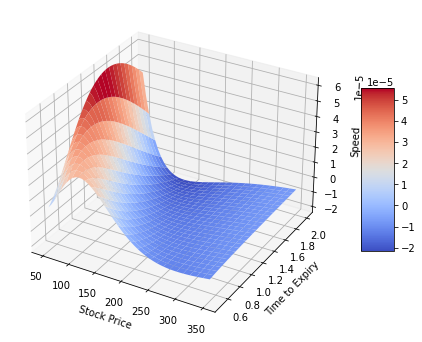

In [447]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

# THETA

In [475]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "put":
        theta = -vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) + q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) - r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [476]:
theta(282.99, 280, 1, 0.0146, 0, 0.6603, 'put')

-37.305139734597944

In [481]:
T = np.linspace(0.01,1,40)
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Put [i] = theta(282.99, 280, T[i], 0.0146, 0, 0.6603, 'put')

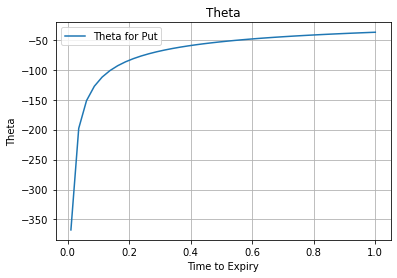

In [483]:
fig = plt.figure()
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Put'])

# Surface of Theta

In [486]:
S = np.linspace(1, 500, 150)
T = np.linspace(0.01, 1, 51)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 280, T[i], 0.0146, 0, 0.6603, 'put')

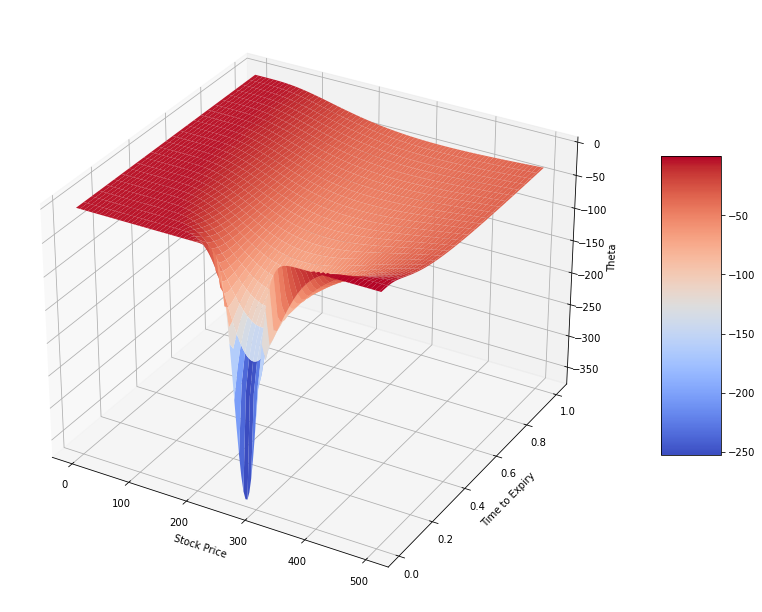

In [485]:
fig = plt.figure(figsize=(20, 11))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

# RHO

In [99]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [220]:
rho(282.99, 280, 1, 0.0146, 0, 0.6603, 'put')

-169.659563715486

In [221]:
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Put [i] = rho(282.99, 280, 1, r[i], 0, 0.6603, 'put')

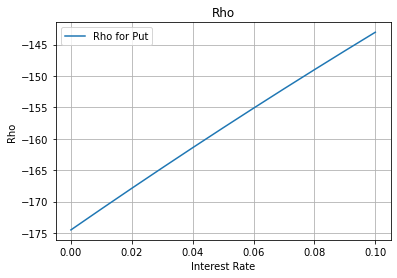

In [222]:
fig = plt.figure()
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Put'])

# Surface of Rho

In [243]:
S = np.linspace(1, 1000, 51)
T = np.linspace(0.5, 2, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 280, T[i], 0.0146, 0, 0.6603, 'put')

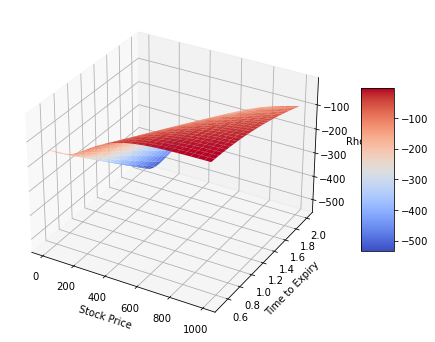

In [244]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

# VEGA

In [550]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [551]:
vega(282.99, 280, 1, 0.0146, 0, 0.6603, 'put')

105.49177678131713

In [552]:
vol = np.linspace(0.1,0.5,40)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(282.99, 280, 1, 0.0146, 0, vol[i], 'put')

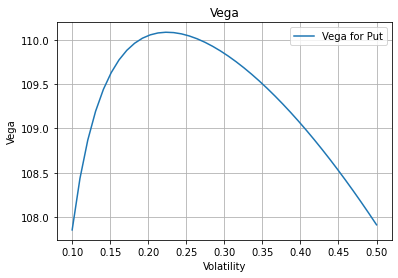

In [553]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Put'])

# Surface of Vega

In [560]:
S = np.linspace(1, 1000, 51)
T = np.linspace(0.5, 2, 51)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 280, T[i], 0.0146, 0, 0.6603, 'put')

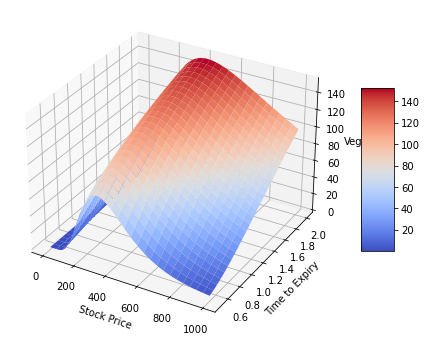

In [561]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

# Conclusion

In [565]:
print('The fair Price for the','BIIB','American',payoff,'Option is $',round(avgVal ,3),'.')

The fair Price for the BIIB American put Option is $ 72.066 .
